# Prueba t (T-test)

Clase 25/07/2023

La prueba t es una técnica estadística utilizada para compara las medias de dos grupos y determinar su existen diferencias significativas entre ellas

- ### Prueba t de muestras independientes
Se comparan las medias de dos grupos independientes como el rendimiento de un grupo de estudiantes que hayan recibido un entrenamiento y otro que no lo recibió

- ### Prueba t de muestras relacionadas o emparejadas
Se utiliza cuando se comparan las medias de dos grupos que estàn emparejados o relcionados. Antes y después de un tratamiento en el mismo grupo de individuos

Cuando utilizamos la función **stats.ttest_1samp()** de la biblioteca scipy.stats en Python para realizar una prueba t de una muestra, el resultado incluirá una estadística **(statistic)** y un valor p **(p-value)**

### *Statistic*
La estadística **(statistic)** es el valor t calculado durante la prueba. **Cuando mayor sea el valor absoluto de la estadística, mayor será la diferencia observada entre la muestra y el valor esperado**


### *P-value*
El valor p(p-value) es la **probabilidad de obtener una estadística igual que la observada, bajo la hipótesis nula de que la media de la muestra es igual al valor esperado** 
Un valor p bajo (<0.05) sugiere que hay evidencia suficiente para rechazar la hipótesis nula y considerar que la diferencia es estadísticamente significativa.

### *df (Degrees of Freedom)*
Número de muestras menos uno

# Prueba de Kolmogorov-Smirnov

La prueba de Kolmogorov-Smirnov es una prueba estadística no paramétrica que compara la función de distribución acumulada empírica con una distribución teórica para evaluar similitud o adecuación de datos. Se usa *p-valor* para estimar la similitud de las dos distribuciones.

Una **prueba estadística no paramétrica** es un método que no requiere supuestos sobre la distribución de los datos y se utiliza cuando los datos no siguen una distribución específica.

In [1]:
from scipy import stats

In [2]:
muestra = [220.1, 220.5, 221.2, 221.8, 222.5, 223.1, 223.7]
muestra

[220.1, 220.5, 221.2, 221.8, 222.5, 223.1, 223.7]

In [3]:
# T-test
result = stats.ttest_1samp(muestra, 225)
result

TtestResult(statistic=-6.249990669147964, pvalue=0.0007777459267474468, df=6)

In [4]:
print(f'p-valor{result[1]}')

p-valor0.0007777459267474468


In [5]:
muestra2 = [225.01, 225.02, 225.03, 224.97, 224.95, 224.999, 225.01]
muestra2

[225.01, 225.02, 225.03, 224.97, 224.95, 224.999, 225.01]

In [6]:
result2 = stats.ttest_1samp(muestra2, 225)
result2

TtestResult(statistic=-0.1457283897780442, pvalue=0.8889083794397654, df=6)

#### Prueba de Kolmogorov-Smirnov

In [13]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [10]:
N = 10**6
np.random.seed(12)# Se debe tener semillas distintas para los set de datos dado que de ser iguales los datos serán iguales y la prueba dará 1
datos1 = np.random.normal(1, 1, N) 
np.random.seed(42)
datos2 = np.random.normal(1, 1, N)

In [11]:
kstest(datos1, datos2).pvalue.round(3)

0.62

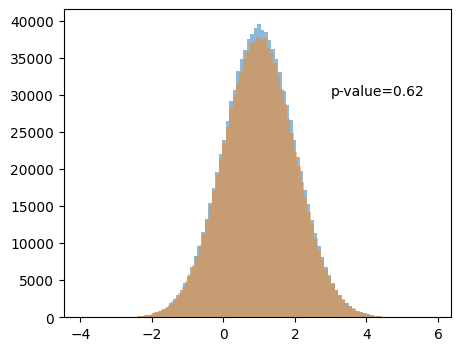

In [14]:
plt.figure(figsize= (5,4))
plt.hist(datos1, alpha= 0.5, bins=100)
plt.hist(datos2, alpha= 0.5, bins=100)
plt.text(3, 30000, f'p-value={kstest(datos1, datos2).pvalue.round(3)}')
plt.show()

Experimento de lanzamiento de monedas

In [15]:
p = 0.5 # Probabilidad de cara

num_lanzamientos = 30
iteraciones = 10**5

# Lista para almacenar resultados de lanzamientos
resultados = []

for _ in range(iteraciones):
    # Simular lanzamientos y contar caras
    c = 0 # Valor inicial de caras
    for _ in range(num_lanzamientos):
        if np.random.rand() < p:
            c += 1
    resultados.append(c)

In [16]:
z = np.random.binomial(n = 30, p = 0.5, size= iteraciones)

In [17]:
# Verificación cuantitativa
pvalor = kstest(resultados, z).pvalue.round(3)
pvalor

0.989

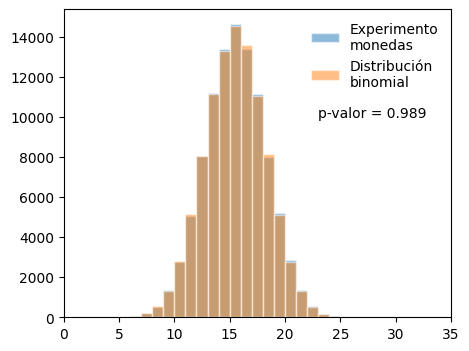

In [18]:
plt.figure(figsize= (5,4))
cuentas, barras, ejes = plt.hist(resultados, edgecolor= 'white' ,bins= 31, range=(0,31),
                                 label = 'Experimento\nmonedas', alpha=0.5)
plt.hist(z, edgecolor= 'white' ,bins= 31, range=(0,31),
                                 label = 'Distribución\nbinomial', alpha=0.5)
plt.xlim(0, 35)
plt.text(23, 10000, f'p-valor = {pvalor}')
plt.legend(frameon = False) # frameon quitar o poner el cuadro de la leyenda
plt.show()

Se confirma cualitativa y cuantitativamente que la distribución de frecuencias del número de caras que se obtienen en 30 lanzamientos es similar a una variable aleatoria con distribución de Binomial.